In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract

# Single Image Analysis

In [59]:
img = cv.imread(r"F:\Muthu_2023\Personal\NextStep\CVProjects\DigitalMeterReading\Dataset\Screenshots\01.png")

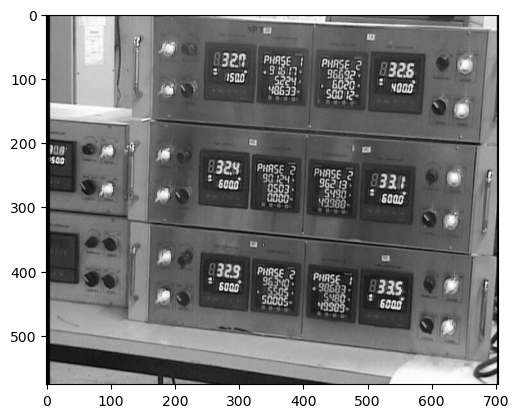

In [3]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

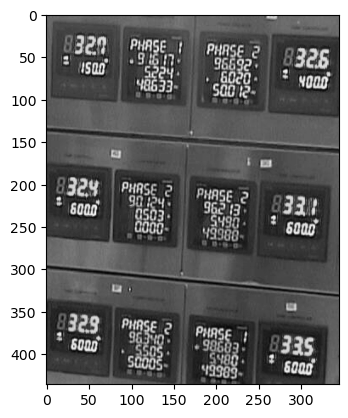

In [4]:
x = 240
y = 35
w = 345
h = 436
img_gray_crop = img_gray[y:y+h,x:x+w]
plt.imshow(img_gray_crop, cmap='gray')

'329\n'

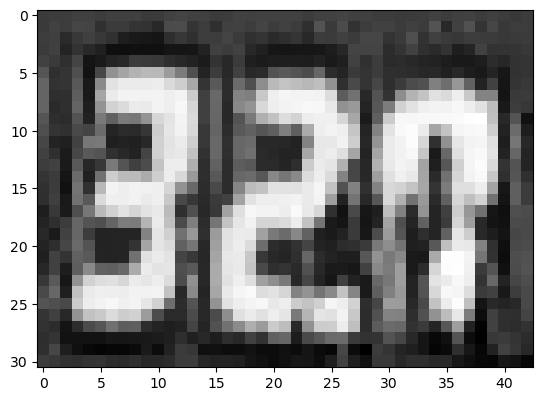

In [18]:
x = 271
y = 55
w = 43
h = 31
img_gray_crop = img_gray[y:y+h,x:x+w]
plt.imshow(img_gray_crop, cmap='gray')
text = pytesseract.image_to_string(cv.GaussianBlur(img_gray_crop, (5,5), 0)) #, config="--psm 7 digits")
text

In [6]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

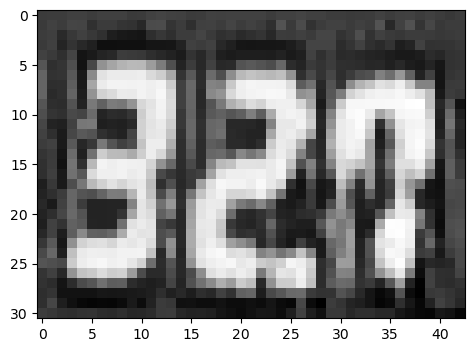

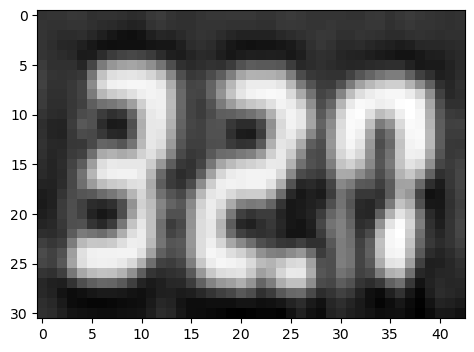

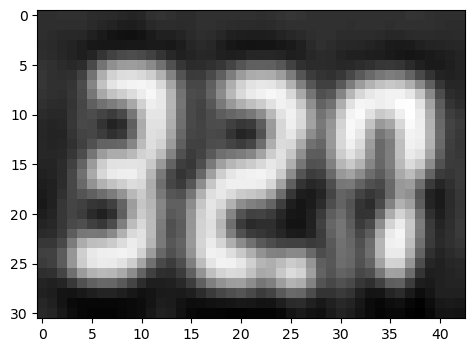

In [15]:

for i in range(1, 6, 2):
    plt.figure(figsize=(8,4))
    plt.imshow(cv.GaussianBlur(img_gray_crop, (i,i), 0), cmap='gray')


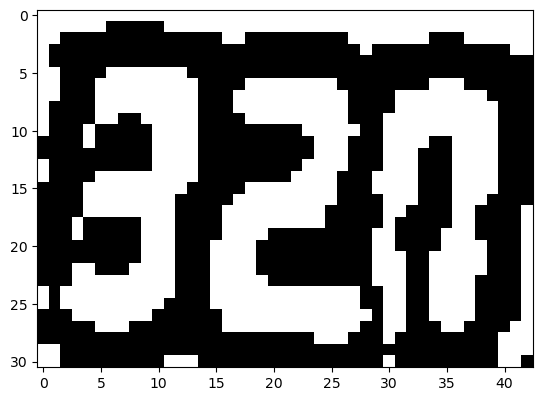

In [23]:
thresh = cv.adaptiveThreshold(cv.GaussianBlur(img_gray_crop, (5,5), 0), 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv.THRESH_BINARY, 11, 2)
plt.imshow(thresh, cmap='gray')

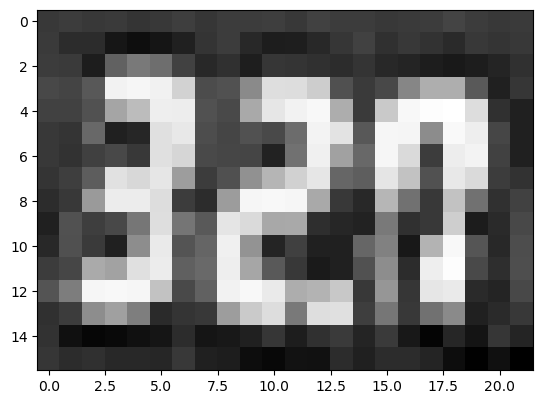

In [25]:
img_gray_re = cv.resize(img_gray_crop, dsize=(0,0), fx=0.5, fy=0.5, interpolation=cv.INTER_LINEAR)
plt.imshow(img_gray_re, cmap='gray')

(array([10923., 46064., 60086., 97161., 75263., 40139., 39059., 15401.,
        11475.,  9933.]),
 array([  0. ,  25.4,  50.8,  76.2, 101.6, 127. , 152.4, 177.8, 203.2,
        228.6, 254. ]),
 <BarContainer object of 10 artists>)

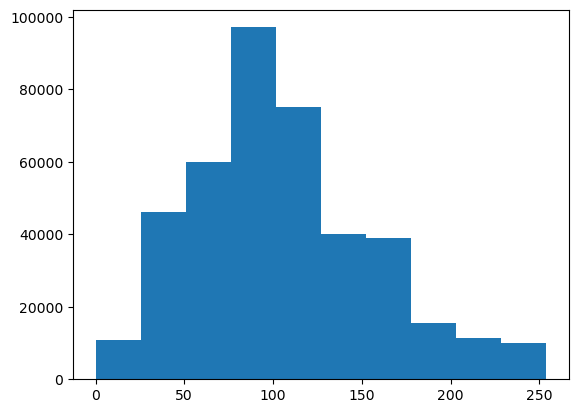

In [26]:
plt.hist(img_gray.flatten())

'329\n'

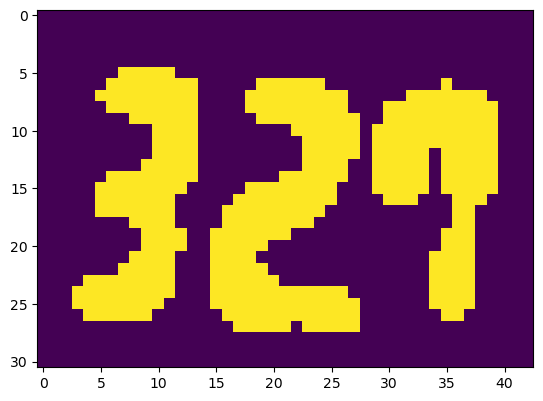

In [32]:
blurred = cv.GaussianBlur(img_gray_crop, (5,5), 0)
_, threshold_otsu = cv.threshold(blurred, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(threshold_otsu)
text = pytesseract.image_to_string(threshold_otsu) #, config="--psm 7 digits")
text

''

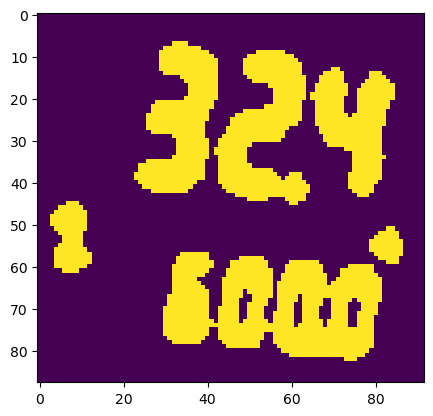

In [33]:
img = cv.imread(r"F:\Muthu_2023\Personal\NextStep\CVProjects\DigitalMeterReading\Dataset\Screenshots\cropped2.png")
img_gray_crop = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blurred = cv.GaussianBlur(img_gray_crop, (5,5), 0)
_, threshold_otsu = cv.threshold(blurred, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(threshold_otsu)
text = pytesseract.image_to_string(threshold_otsu) #, config="--psm 7 digits")
text

In [ ]:
# Increase contrast
adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

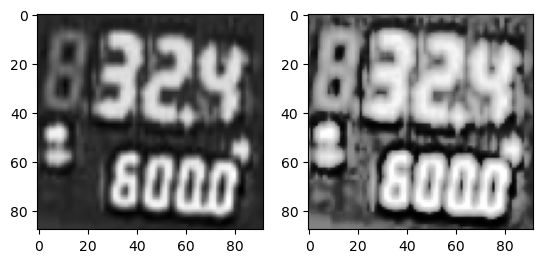

In [35]:
equalized = cv.equalizeHist(img_gray_crop)
plt.subplot(1,2,1)
plt.imshow(img_gray_crop, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(equalized, cmap='gray')

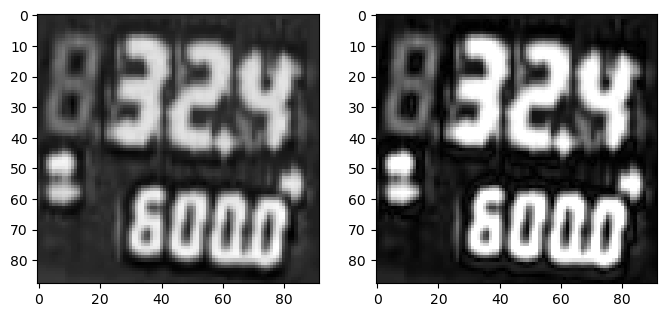

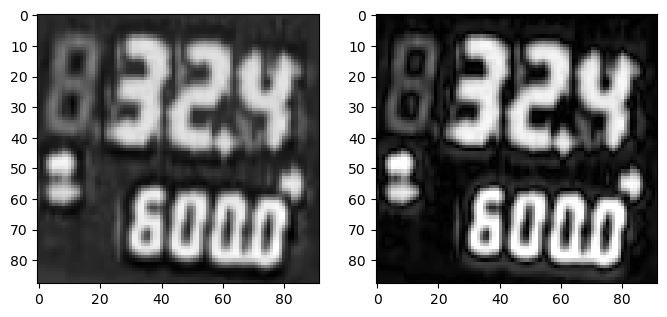

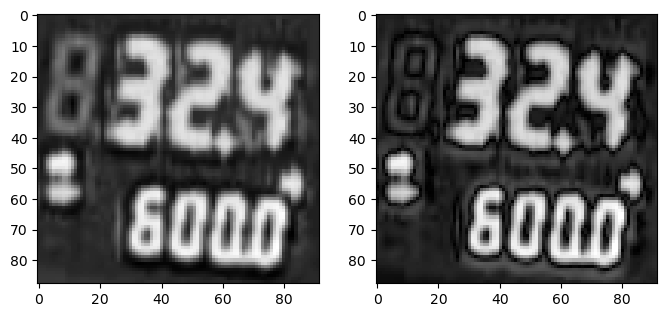

In [39]:
alpha= [1.5]
beta = [-50, -75, -100]
for i in range(len(beta)):
    plt.figure(figsize=(8,4))
    adjusted = cv.convertScaleAbs(img_gray_crop, alpha=alpha[0], beta=beta[i])
    plt.subplot(1,2,1)
    plt.imshow(img_gray_crop, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(adjusted, cmap='gray')

# Gaussian Blur

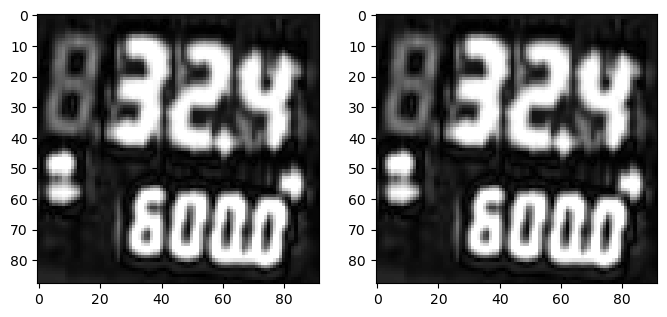

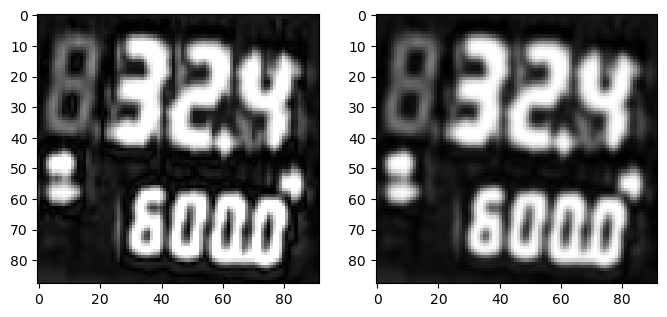

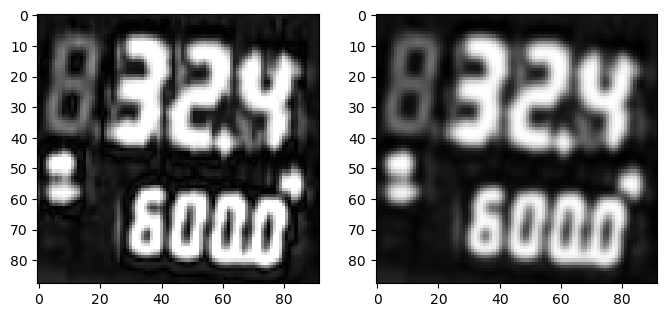

In [40]:
adjusted = cv.convertScaleAbs(img_gray_crop, alpha=1.5, beta=-50)
for i in range(1,6,2):    
    plt.figure(figsize=(8,4))
    blurred = cv.GaussianBlur(adjusted, (i,i), 0)
    plt.subplot(1,2,1)
    plt.imshow(adjusted, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(blurred, cmap='gray')

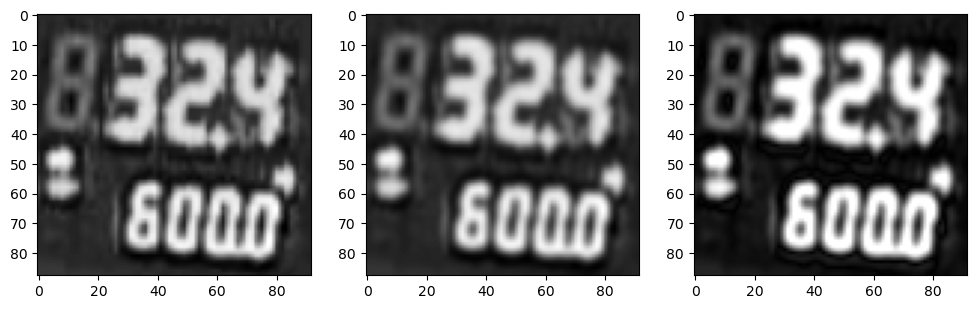

In [46]:
blurred = cv.GaussianBlur(img_gray_crop, (3,3), 0)
adjusted = cv.convertScaleAbs(blurred, alpha=1.5, beta=-50)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img_gray_crop, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(blurred, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(adjusted, cmap='gray')

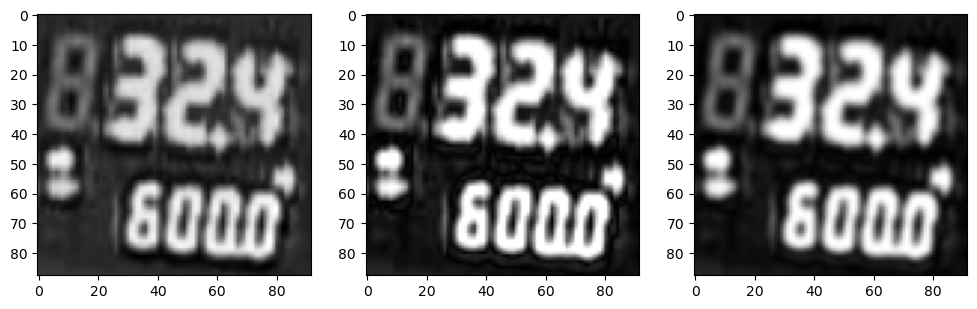

In [45]:
adjusted = cv.convertScaleAbs(img_gray_crop, alpha=1.5, beta=-50)
blurred = cv.GaussianBlur(adjusted, (3,3), 0)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img_gray_crop, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(adjusted, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(blurred, cmap='gray')

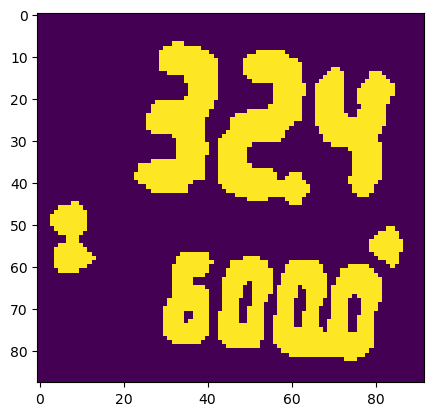

In [47]:
_, threshold_otsu = cv.threshold(adjusted, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(threshold_otsu)

In [51]:
boxes = pytesseract.image_to_boxes(img_gray_crop)
boxes

''

In [50]:
pd.value_counts(threshold_otsu.flatten())

0      5903
255    2193
dtype: int64

In [60]:


# Load image
#image = cv2.imread("text_image.jpg")
image = img
# Load EAST text detector model
net = cv.dnn.readNet("frozen_east_text_detection.pb")

# Get image dimensions
(H, W) = image.shape[:2]
newW, newH = (320, 320)
rW, rH = W / float(newW), H / float(newH)
image = cv2.resize(image, (newW, newH))

# Convert to blob and perform forward pass
blob = cv.dnn.blobFromImage(image, 1.0, (newW, newH), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)
(scores, geometry) = net.forward(["feature_fusion/Conv_7/Sigmoid", "feature_fusion/concat_3"])

# Decode detections and draw bounding boxes



In [61]:
def decode_predictions(scores, geometry):
    boxes = []
    confidence_threshold = 0.5
    for y in range(scores.shape[2]):
        for x in range(scores.shape[3]):
            score = scores[0, 0, y, x]
            if score < confidence_threshold:
                continue
            offset_x, offset_y = x * 4.0, y * 4.0
            angle = geometry[0, 4, y, x]
            h, w = geometry[0, 0, y, x], geometry[0, 1, y, x]
            end_x = int(offset_x + (w * np.cos(angle)) + (h * np.sin(angle)))
            end_y = int(offset_y - (w * np.sin(angle)) + (h * np.cos(angle)))
            boxes.append((offset_x, offset_y, end_x, end_y))
    return boxes



In [62]:
boxes = decode_predictions(scores, geometry)
for (x, y, x2, y2) in boxes:
    cv.rectangle(image, (int(x*rW), int(y*rH)), (int(x2*rW), int(y2*rH)), (0, 255, 0), 2)

# cv.imshow("Detected Text", image)
# cv.waitKey(0)
# cv.destroyAllWindows()

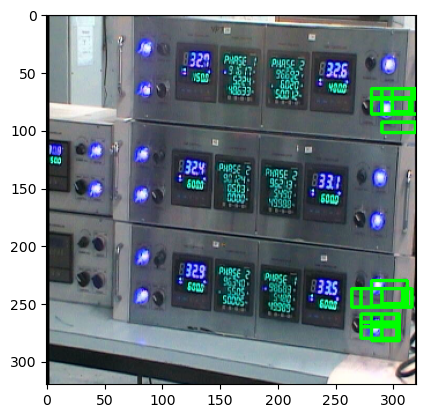

In [63]:
plt.imshow(image)

In [66]:
import os
os.listdir(r"F:\Work\DHR\Experiment\Results\ThermalShock")

['TIN with MgO Brick thermal shock exp test_03_03_25-20250303084919.xlsx',
 'TIN with MgO Brick thermal shock exp test_03_03_25-20250303122739.xlsx',
 'TIN with MgO Brick thermal shock exp test_03_03_25-20250303130350.xlsx',
 'TIN with MgO Brick thermal shock exp test_03_03_25-20250303164209.xlsx',
 'TIN with MgO Brick thermal shock exp test_03_03_25-20250303171050.xlsx',
 'TIN with MgO Brick thermal shock exp test_03_03_25-20250303174030.xlsx',
 'TIN with MgO Brick thermal shock exp test_03_03_25-20250303180427.xlsx',
 'TIN with MgO Brick thermal shock exp test_03_03_25-20250303181758.xlsx',
 'TIN with MgO Brick thermal shock exp test_03_03_25-20250303192148.xlsx',
 'TIN with MgO Brick thermal shock exp test_04_03_25-20250304101148.xlsx',
 'TIN with MgO Brick thermal shock exp test_04_03_25-20250304112013.xlsx',
 'TIN with MgO Brick thermal shock exp test_04_03_25-20250304112118.xlsx',
 'TIN with MgO Brick thermal shock exp test_04_03_25-20250304141216.xlsx',
 '~$TIN with MgO Brick th

In [67]:
data = pd.read_excel(r"F:\Work\DHR\Experiment\Results\ThermalShock\TIN with MgO Brick thermal shock exp test_03_03_25-20250303084919.xlsx")

C:\Users\ADMIN\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
data.head()